In [1]:
#import scvi
import scanpy as sc
import pandas as pd
import numpy as np

In [2]:
import matplotlib.pyplot as plt

In [3]:
import anndata

In [4]:
import os

In [5]:
import random

In [6]:
#from pyscenic.aucell import aucell
#from pyscenic.genesig import GeneSignature
#from pyscenic.aucell import create_rankings, enrichment

In [6]:
data_dir = ''

#### Load data

In [7]:
adata_ref = sc.read(os.path.join(data_dir, 'zenodo', 'adata_ref_nk.h5ad'))

/home/ubuntu/miniconda3/envs/scenic/lib/python3.9/site-packages/anndata/__init__.py:51: FutureWarning: `anndata.read` is deprecated, use `anndata.read_h5ad` instead. `ad.read` will be removed in mid 2024.
  warnings.warn(


#### Train scVI model

In [56]:
scvi.model.SCVI.setup_anndata(adata,
                                batch_key='batch')

/itf-fi-ml/home/hermankn/.local/lib/python3.8/site-packages/scvi/data/fields/_layer_field.py:91: UserWarning: adata.X does not contain unnormalized count data. Are you sure this is what you want?
  warnings.warn(


In [57]:
scvi_model = scvi.model.SCVI(adata,
                        n_latent=20,#n_latent=40,
                        n_layers=2,
                        gene_likelihood = "nb")

In [58]:
scvi_model.train()

GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0,1,2,3]


Epoch 158/158: 100%|██████████| 158/158 [20:49<00:00,  8.29s/it, loss=2.52e+03, v_num=1]

`Trainer.fit` stopped: `max_epochs=158` reached.


Epoch 158/158: 100%|██████████| 158/158 [20:49<00:00,  7.91s/it, loss=2.52e+03, v_num=1]


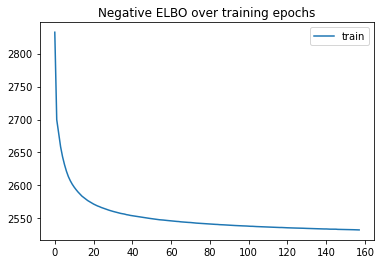

In [59]:
plt.plot(scvi_model.history["elbo_train"], label="train")
#plt.plot(vae.history["elbo_validation"], label="val")
plt.title("Negative ELBO over training epochs")
#plt.ylim(1100, 1500)
plt.legend()

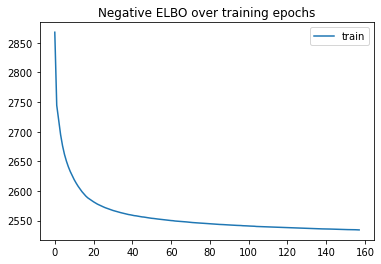

In [65]:
plt.plot(scvi_model.history["elbo_train"], label="train")
#plt.plot(vae.history["elbo_validation"], label="val")
plt.title("Negative ELBO over training epochs")
#plt.ylim(1100, 1500)
plt.legend()

In [61]:
adata.obsm["X_scVI"] = scvi_model.get_latent_representation()

In [62]:
sc.pp.neighbors(adata, use_rep="X_scVI")

#### Load adata

In [95]:
adata = sc.read(os.path.join(data_dir, 'zenodo', 'adata_ref_after_training.h5ad'))

/home/ubuntu/miniconda3/envs/scenic/lib/python3.9/site-packages/anndata/__init__.py:51: FutureWarning: `anndata.read` is deprecated, use `anndata.read_h5ad` instead. `ad.read` will be removed in mid 2024.
  warnings.warn(
